# I] Import functions and options

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [4]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

## 1. Download the file with all the protein gene expression

In [9]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "dataframes_for_input/"
df_norm_protGE = pandas.read_csv(path+"zscore_df_norm.tsv", sep = "\t")
df_prim_protGE = pandas.read_csv(path+"zscore_df_prim.tsv", sep = "\t")

print(df_norm_protGE.shape)
print(df_prim_protGE.shape)
df_norm_protGE.head(2)

(19382, 5904)
(19382, 8023)
Wall time: 1min 34s


,Unnamed: 0,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000198888,1.190884,0.898610,-0.272200,-0.031037,0.898610,-3.494575,-1.226637,1.333401,0.898610,...,0.765988,0.352102,-1.652882,0.765988,0.641517,-0.031037,0.352102,-0.272200,-1.038047,0.898610
1,ENSG00000198763,-0.277555,-0.774308,0.625942,-0.074143,0.625942,-4.268193,0.259062,0.625942,-0.074143,...,0.097681,0.097681,-2.623235,-0.277555,0.259062,-0.074143,0.097681,-0.074143,-1.938165,0.809955


In [10]:
#set_index
for df in df_norm_protGE, df_prim_protGE:
    df.set_index('Unnamed: 0', inplace=True)

df_norm_protGE.index.name = None
df_prim_protGE.index.name = None

#Transpose
df_norm_protGE = df_norm_protGE.T
df_prim_protGE = df_prim_protGE.T

df_norm_protGE.head()

,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
GTEX-1117F-0226-SM-5GZZ7,1.190884,-0.277555,-0.152273,-0.802258,0.462616,-0.487510,0.877833,-3.532301,-1.640655,-1.339982,...,-0.131867,-1.644834,-0.065565,1.209003,-0.394348,0.281347,-0.169428,-0.689030,0.609651,1.422054
GTEX-1117F-0526-SM-5EGHJ,0.898610,-0.774308,-0.800803,-0.601867,0.462616,0.337704,0.877833,-4.439396,-1.219738,-0.340598,...,-1.069663,-1.981972,-1.380917,0.274872,0.845416,-0.427080,-0.704039,-1.641740,-0.252226,0.736184
GTEX-1117F-0626-SM-5N9CS,-0.272200,0.625942,-2.507672,-1.885034,0.462616,0.337704,0.291986,0.274095,-1.779393,-2.014468,...,-0.701674,0.109060,0.495935,-0.803790,-0.045197,-0.233564,-0.889340,-0.537283,0.359816,1.360409
GTEX-1117F-0726-SM-5GIEN,-0.031037,-0.074143,0.295997,-0.388352,0.462616,0.701293,0.291986,-0.093694,0.851155,0.531753,...,1.771613,0.643946,0.567730,0.526216,-0.126359,0.652185,0.005941,-0.019630,0.871017,0.121985
GTEX-1117F-1326-SM-5EGHH,0.898610,0.625942,-1.238498,-0.802258,0.462616,0.701293,0.556236,-0.283281,0.851155,0.714077,...,-0.543028,0.221372,-1.073496,0.227592,-0.772860,0.041929,-1.035634,-0.671648,1.016719,1.019271


## 2. Download the file with ATG7 isoforms expression

In [39]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + 'ATG7/TCGA_GTEX/all_filtered_tissues/dataframes_for_input/'

df_ATG7_Normal = pandas.read_csv(path+"df_ATG7_Normal_filtered.csv", index_col=0, sep = ",")
df_ATG7_Primary = pandas.read_csv(path+"df_ATG7_Primary_filtered.csv", index_col=0, sep = ",")

print(df_ATG7_Normal.shape)
print(df_ATG7_Primary.shape)
df_ATG7_Normal.head(2)

(3753, 18)
(5300, 18)
Wall time: 45.4 ms


,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
sample,,,,,,,,,,,,,,,,,,
GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,NaN,NaN,4.558498,2.996009,2.021477,0.879716,22.563767,6.977902,3.059994,0.840013,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,NaN,NaN,4.364710,3.132488,2.210724,0.963466,19.601965,7.769460,3.629077,0.949989,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


In [40]:
#drop OS 
df_ATG7_Normal = df_ATG7_Normal.drop(['OS', 'OS_time'], axis =1)
df_ATG7_Primary = df_ATG7_Primary.drop(['OS', 'OS_time'], axis =1)

df_ATG7_Normal = df_ATG7_Normal.iloc[:,:5]
df_ATG7_Primary = df_ATG7_Primary.iloc[:,:5]

df_ATG7_Normal.head()

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2
sample,,,,,
GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.558498,2.996009,2.021477
GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.364710,3.132488,2.210724
GTEX-11TT1-0126-SM-5LUAA,Normal Tissue,Adrenal Gland,4.343785,3.047752,2.451870
GTEX-O5YT-1326-SM-3MJGR,Normal Tissue,Adrenal Gland,4.299133,3.257208,1.933420
GTEX-11NSD-0226-SM-5A5LR,Normal Tissue,Adrenal Gland,4.293438,3.120975,2.060095


In [41]:
# Convert expression in Zscore
df_ATG7_Normal.iloc[:,2:] = scipy.stats.zscore(df_ATG7_Normal.iloc[:,2:], axis=0)

df_ATG7_Primary.iloc[:,2:] = scipy.stats.zscore(df_ATG7_Primary.iloc[:,2:], axis=0)
df_ATG7_Primary.iloc[:,2:].std(axis=0)

ATG7      1.000094
ATG7_1    1.000094
ATG7_2    1.000094
dtype: float64

In [43]:
#Normal, number of sample is 3753 in normal and 5300 in primary (only tissues present in Norm & Prim)
df_ATG7_protGE_norm = pandas.concat([df_ATG7_Normal, df_norm_protGE], axis=1)
df_ATG7_protGE_norm = df_ATG7_protGE_norm.dropna(subset=['Sample_Type'])
print(df_ATG7_protGE_norm.shape)

df_ATG7_protGE_prim = pandas.concat([df_ATG7_Primary, df_prim_protGE], axis=1)
df_ATG7_protGE_prim = df_ATG7_protGE_prim.dropna(subset=['Sample_Type'])
print(df_ATG7_protGE_prim.shape)

df_ATG7_protGE_norm

(3753, 19387)
(5300, 19387)


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,1.815445,0.188303,1.374218,-0.272200,0.625942,0.413822,-1.015618,-0.322422,...,-1.173260,0.619697,0.144289,-1.142107,1.247534,1.837165,0.047156,0.565569,0.026989,0.298003
GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,1.436636,0.515258,1.604451,0.641517,-0.074143,0.829227,0.571510,0.462616,...,-0.859127,-0.535319,2.025037,-1.072081,-1.527830,-0.538107,-0.298330,0.391760,0.010796,-0.037701
GTEX-11TT1-0126-SM-5LUAA,Normal Tissue,Adrenal Gland,1.395731,0.312261,1.897823,0.765988,0.097681,0.829227,-0.146301,0.462616,...,-1.105795,-0.474887,1.478237,-1.010651,-1.484966,-0.176774,0.374623,1.156281,-1.005845,0.109282
GTEX-O5YT-1326-SM-3MJGR,Normal Tissue,Adrenal Gland,1.308448,0.814044,1.267089,0.352102,0.097681,0.532137,-0.146301,0.462616,...,-1.192889,-1.158654,1.847638,-0.954114,-1.975935,-1.209659,0.013122,0.565569,-0.467724,0.131480
GTEX-11NSD-0226-SM-5A5LR,Normal Tissue,Adrenal Gland,1.297316,0.487677,1.421198,0.352102,0.431011,0.532137,0.571510,0.462616,...,-0.928268,-0.219672,0.815843,-0.692526,-1.441126,-0.438980,-0.047573,0.231672,-0.160569,0.147571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-1399U-1326-SM-5IJET,Normal Tissue,Uterus,-0.281511,0.527998,-0.338651,0.641517,0.625942,0.666142,-0.388352,0.462616,...,-1.127812,1.189806,0.291545,-0.134323,-0.628057,0.139610,0.552785,-0.094968,-0.338902,0.846367
GTEX-132AR-1526-SM-5KM1L,Normal Tissue,Uterus,-0.366844,-0.175568,-1.085066,-0.467871,-0.074143,1.177284,0.082193,-0.322422,...,-1.113319,1.550897,-0.344463,-0.383621,-0.121698,-0.472073,-0.386194,-0.976913,-0.061221,1.008222
GTEX-139D8-2526-SM-5N9G3,Normal Tissue,Uterus,-0.524372,-0.204421,-1.085066,-1.590096,1.204015,-3.577565,-0.601867,0.462616,...,-1.163296,0.803547,-0.137576,0.082602,0.078938,-0.054148,0.912149,0.793224,-0.388297,1.062061
GTEX-ZV6S-1526-SM-5NQ7O,Normal Tissue,Uterus,-0.596626,0.163168,-0.886168,-1.590096,0.994734,-2.315229,-0.601867,0.462616,...,-0.853493,1.836646,0.800774,-0.808244,-0.536603,1.113669,-0.030260,0.729993,-0.711636,1.044958


## 3. Download the file with list of the protein 

In [44]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 42.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] Expression correlation between ATG7 and all protein coding 

In [53]:
df_ATG7_protGE_norm.iloc[:,2:].max()

ATG7               3.490050
ATG7_1             2.550887
ATG7_2             3.281268
ENSG00000198888    1.691263
ENSG00000198763    2.002290
                     ...   
ENSG00000181817    2.916063
ENSG00000116885    4.602341
ENSG00000116898    5.349560
ENSG00000119535    3.982748
ENSG00000142694    2.815953
Length: 19385, dtype: float64

In [54]:
%%time
# Spearman Correlation, all genes WITHOUT cutoff
all_tissue_used = [[df_ATG7_protGE_norm,'Normal_Tissues'], 
                   [df_ATG7_protGE_prim,'Primary_Tumors']]

isoforms = ['ATG7_1', 'ATG7_2']

all_positiv_corr_spearman = []
all_negativ_corr_spearman = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.spearmanr(x, y)

      if r_value > 0:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < 0:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(ensembl_gene_id= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_spearman_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_spearman_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)
    
    #save positive
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_all/'
#     df_positiv_corr.to_excel(output_file_directory+path+positiv_corr+'.xlsx', index=False)
    
    df_negativ_corr['info'] = tissue[1]+'_'+isoform
    df_negativ_corr = protein_coding_list.merge(df_negativ_corr)
    df_negativ_corr = df_negativ_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_negativ_corr = df_negativ_corr.sort_values(['r_value'], ascending = False)
    
    #save negative
#     df_negativ_corr.to_excel(output_file_directory+path+negativ_corr+'.xlsx', index=False)

    all_positiv_corr_spearman.append(df_positiv_corr)
    all_negativ_corr_spearman.append(df_negativ_corr)
  print()

Normal_Tissues (3754, 19387)
ATG7_1
pos_spearman_corr_Normal_Tissues_ATG7_1 (10172, 3)
neg_spearman_corr_Normal_Tissues_ATG7_1 (9194, 3)
ATG7_2
pos_spearman_corr_Normal_Tissues_ATG7_2 (9682, 3)
neg_spearman_corr_Normal_Tissues_ATG7_2 (9684, 3)

Primary_Tumors (5301, 19387)
ATG7_1
pos_spearman_corr_Primary_Tumors_ATG7_1 (9361, 3)
neg_spearman_corr_Primary_Tumors_ATG7_1 (10006, 3)
ATG7_2
pos_spearman_corr_Primary_Tumors_ATG7_2 (9939, 3)
neg_spearman_corr_Primary_Tumors_ATG7_2 (9428, 3)

Wall time: 2min 50s


## 1) Distribution of all rvalue to select cutoff

In [55]:
%%time
#Merge Negative and Positive data
data =  [
         [all_negativ_corr_spearman[0], all_positiv_corr_spearman[0], 'Normal Tissue, ATG7(1)'], 
         [all_negativ_corr_spearman[1], all_positiv_corr_spearman[1], 'Normal Tissue, ATG7(2)'],
         [all_negativ_corr_spearman[2], all_positiv_corr_spearman[2], 'Primary Tumor, ATG7(1)'], 
         [all_negativ_corr_spearman[3], all_positiv_corr_spearman[3], 'Primary Tumor, ATG7(2)']
         ]

all_corr_negpos_merged = []
for dfs in data:
  print(dfs[2])
  print('shape positiv', dfs[0].shape)
  print('shape negativ', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_negpos_merged.append(df_merged)
  print()

all_corr_negpos_merged[1]

Normal Tissue, ATG7(1)
shape positiv (9247, 5)
shape negativ (10260, 5)
shape after merge (19507, 5)

Normal Tissue, ATG7(2)
shape positiv (9754, 5)
shape negativ (9753, 5)
shape after merge (19507, 5)

Primary Tumor, ATG7(1)
shape positiv (10085, 5)
shape negativ (9424, 5)
shape after merge (19509, 5)

Primary Tumor, ATG7(2)
shape positiv (9490, 5)
shape negativ (10019, 5)
shape after merge (19509, 5)

Wall time: 25 ms


,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,ENSG00000107443,CCNJ,-0.00001,0.999498,Normal_Tissues_ATG7_2
1,ENSG00000236782,ZNF593OS,-0.000021,0.998966,Normal_Tissues_ATG7_2
2,ENSG00000213203,GIMAP1,-0.000069,0.996627,Normal_Tissues_ATG7_2
3,ENSG00000110075,PPP6R3,-0.000154,0.992464,Normal_Tissues_ATG7_2
4,ENSG00000115368,WDR75,-0.00017,0.991716,Normal_Tissues_ATG7_2
...,...,...,...,...,...
19502,ENSG00000129187,DCTD,0.000121,0.994104,Normal_Tissues_ATG7_2
19503,ENSG00000171611,PTCRA,0.000118,0.994255,Normal_Tissues_ATG7_2
19504,ENSG00000127311,HELB,0.000072,0.996499,Normal_Tissues_ATG7_2
19505,ENSG00000127022,CANX,0.00005,0.997535,Normal_Tissues_ATG7_2


shape normal (19507, 5)
shape primary (19507, 5)
shape after merge (39014, 5)

shape normal (19509, 5)
shape primary (19509, 5)
shape after merge (39018, 5)



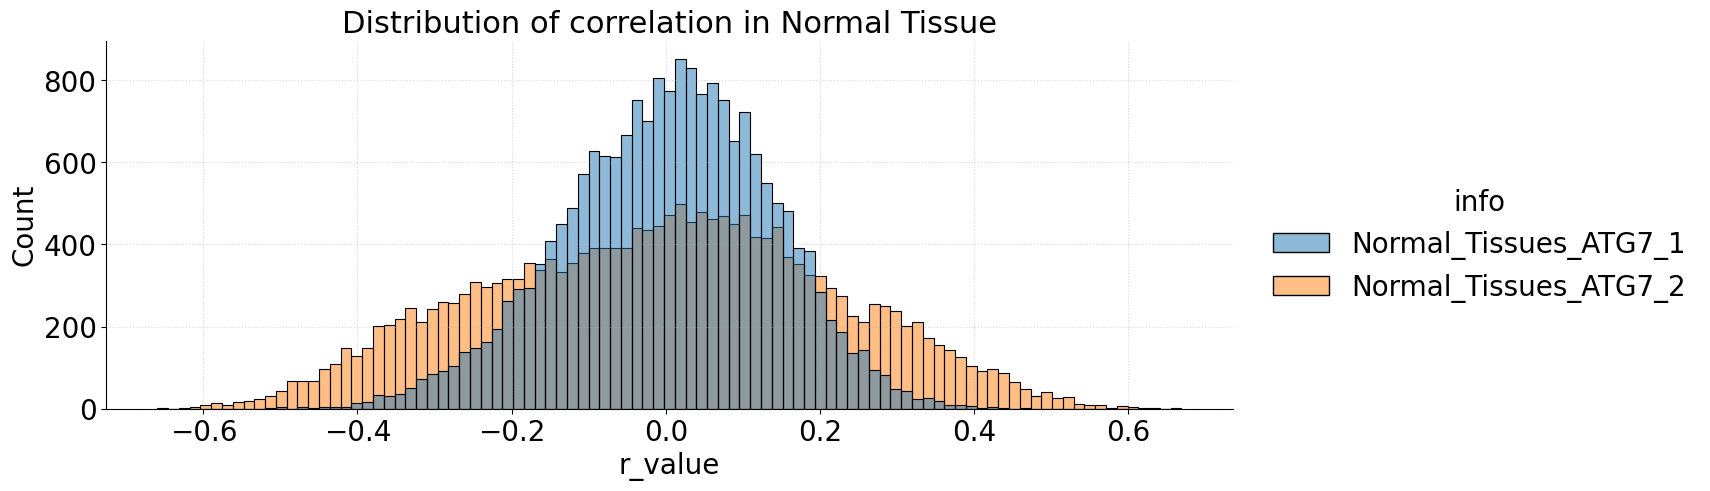

<Figure size 1200x800 with 0 Axes>

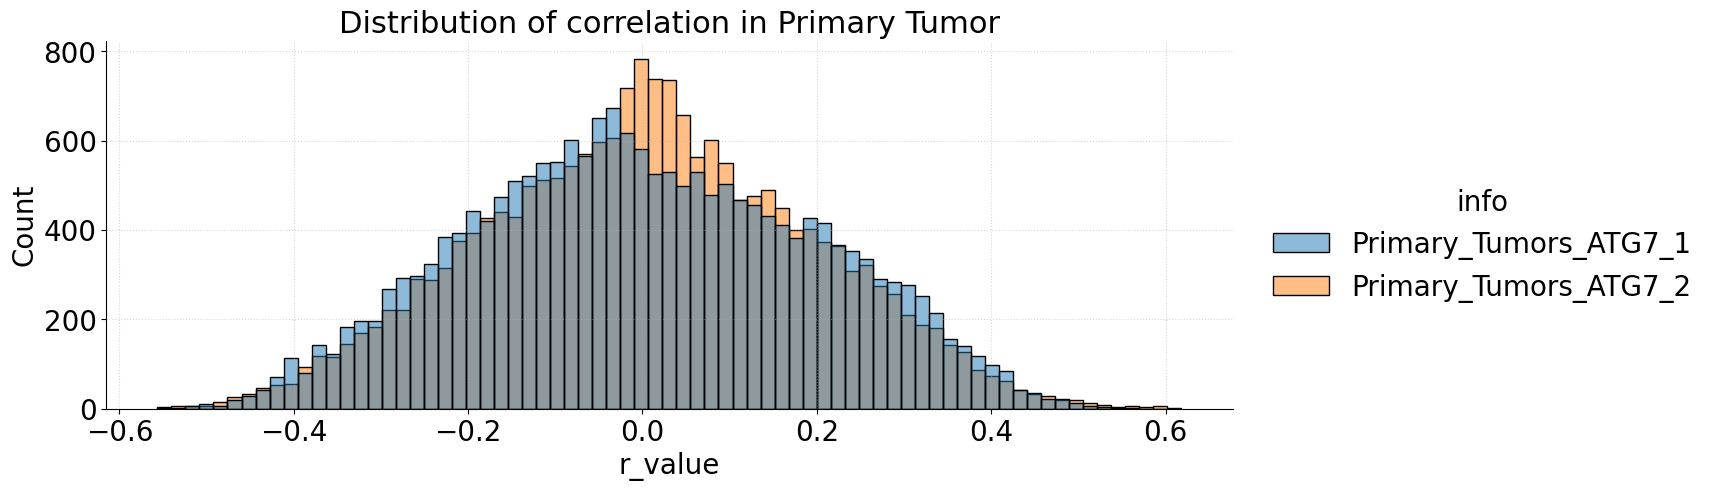

<Figure size 1200x800 with 0 Axes>

In [56]:
#Merge ATG7(1) and ATG7(2)
data = [
        [all_corr_negpos_merged[0], all_corr_negpos_merged[1], 'Normal Tissue'],
        [all_corr_negpos_merged[2], all_corr_negpos_merged[3], 'Primary Tumor']
        ]

all_corr_isoforms_merged = []
for dfs in data:
  print('shape normal', dfs[0].shape)
  print('shape primary', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_isoforms_merged.append(df_merged)
  print()

#Distribution of correlation
data = [
        [all_corr_isoforms_merged[0], 'Normal Tissue'],
        [all_corr_isoforms_merged[1], 'Primary Tumor']
        ]

for dfs in data:
  seaborn.displot(dfs[0], x="r_value", hue='info', aspect = 2.6)
  label_title = 'Distribution of correlation in ' + dfs[1]
  plt.title(label_title, fontsize = 22)
  plt.show()
  plt.clf()
  print()

In [57]:
# have to select the 1% in extremities to have only the interesting one.
## all_corr_negpos_merged = norm iso1, norm iso2, prim iso1, prim iso2

all_corr_negpos_extremities = []

for df in all_corr_negpos_merged:
  df = df.sort_values(['r_value'], ascending = False)
  df = df.reset_index(drop = True)
  
  lenght = len(df)
  only_1perc = int(lenght*0.01)
  just_head = only_1perc
  just_tail = lenght - only_1perc

  df_head = df.iloc[0:just_head,:]
  df_tail = df.iloc[just_tail:,:]
  df_extremeties = pandas.concat([df_head, df_tail], axis=0)

  inform = df['info'][1]
  extremities_name = 'corr_1%extremities'+ '_' +inform
#   df_extremeties.to_excel(extremities_name+'.xlsx', index=False)

  all_corr_negpos_extremities.append(df_extremeties)
    
all_corr_negpos_extremities[3]

,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,ENSG00000275740,NaN,0.618115,0.0,Primary_Tumors_ATG7_2
1,ENSG00000037749,MFAP3,0.602026,0.0,Primary_Tumors_ATG7_2
2,ENSG00000166847,DCTN5,0.601765,0.0,Primary_Tumors_ATG7_2
3,ENSG00000134001,EIF2S1,0.597536,0.0,Primary_Tumors_ATG7_2
4,ENSG00000244462,RBM12,0.597242,0.0,Primary_Tumors_ATG7_2
...,...,...,...,...,...
19504,ENSG00000112659,CUL9,-0.538652,0.0,Primary_Tumors_ATG7_2
19505,ENSG00000175467,SART1,-0.539199,0.0,Primary_Tumors_ATG7_2
19506,ENSG00000161914,ZNF653,-0.541215,0.0,Primary_Tumors_ATG7_2
19507,ENSG00000265303,NaN,-0.549871,0.0,Primary_Tumors_ATG7_2


# IV] Heatmap recap 

In [58]:
all_corr_negpos_ = []

for df in all_corr_negpos_merged:
    df2 = (df.dropna(subset=['ensembl_gene_id'])
             .set_index('ensembl_gene_id').sort_index())
    
    colname = df['info'][0]
    df2 = ( df2.rename(columns = {'r_value' : colname})
            .drop(df2.columns[[0, 2, 3]], axis=1) 
            .fillna(0))
    
    all_corr_negpos_.append(df2)

#merge the df     
df_heatmap_norm = pandas.concat([all_corr_negpos_[0], all_corr_negpos_[1]], axis=1)

df_heatmap_prim = pandas.concat([all_corr_negpos_[2], all_corr_negpos_[3]], axis=1)
df_heatmap_prim


,Primary_Tumors_ATG7_1,Primary_Tumors_ATG7_2
ensembl_gene_id,,
ENSG00000000003,-0.071255,-0.085276
ENSG00000000005,0.203877,-0.001551
ENSG00000000419,-0.376351,0.196555
ENSG00000000457,-0.174076,0.268391
ENSG00000000460,-0.359386,0.317463
...,...,...
ENSG00000282419,-0.019501,0.046284
ENSG00000282608,0.404530,0.069069
ENSG00000282757,0.006483,0.069879


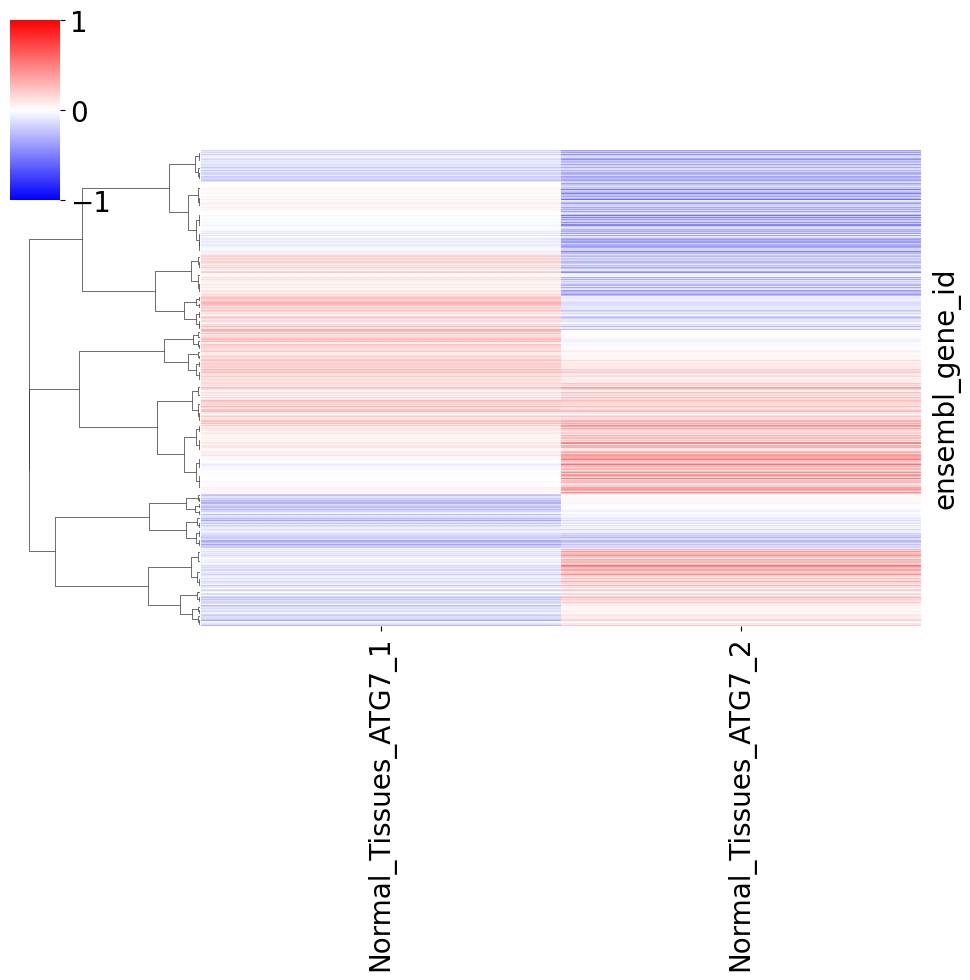

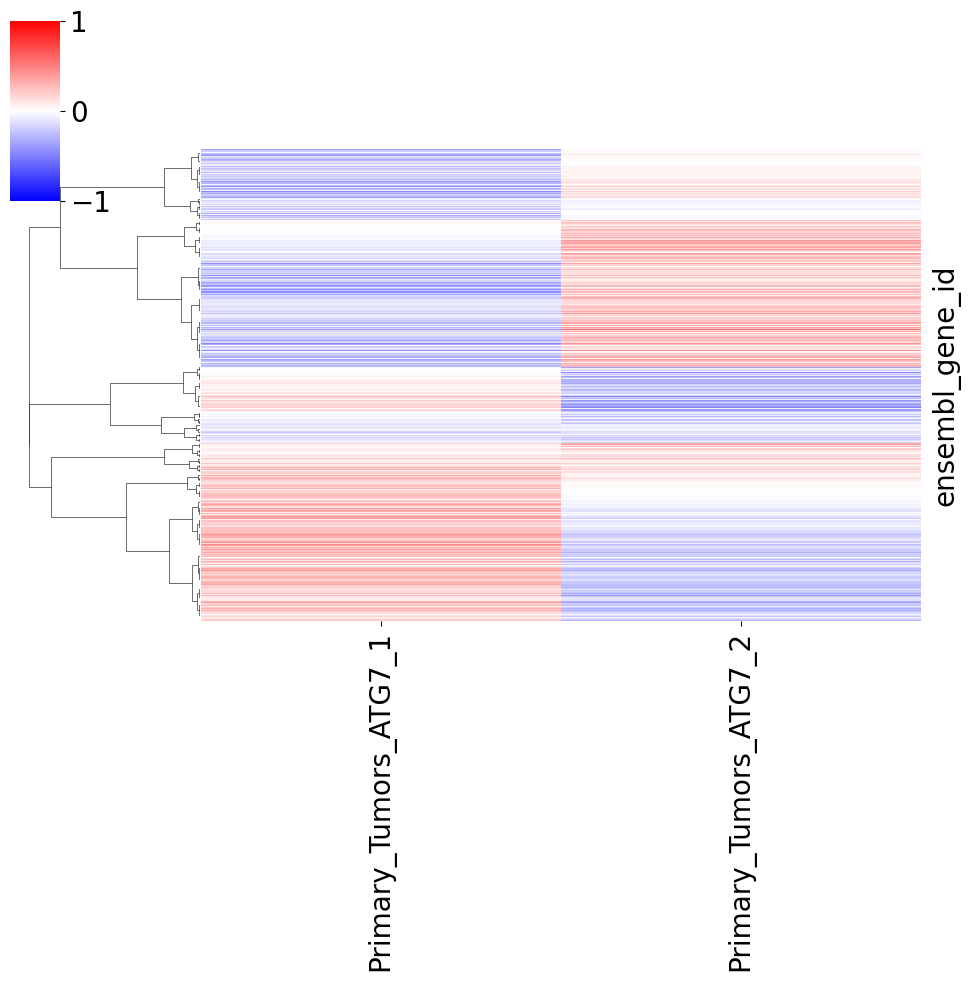

In [60]:
path = 'ATG7/TCGA_GTEX/all_tissues/Correlation/figures_correlation/'

seaborn.clustermap(df_heatmap_norm, vmin=-1, vmax=1, cmap = 'bwr',
                   yticklabels=False, method='complete', metric='cosine', col_cluster=False) 
# plt.title('Correlation of ATG7 expression in normal tissue')
# plt.savefig(output_file_directory+path+'heatmap_corr_normal.jpeg', dpi=1200)

seaborn.clustermap(df_heatmap_prim, vmin=-1, vmax=1, cmap = 'bwr',
                   yticklabels=False, method='complete', metric='cosine', col_cluster=False) 
# plt.title('Correlation of ATG7 expression in primary tumor')
# plt.savefig(output_file_directory+path+'heatmap_corr_primary.jpeg', dpi=1200)

In [61]:
set1 = set(df_heatmap_norm.index) 
set2 = set(df_heatmap_prim.index) 
intersection = list(set1.intersection(set2))

In [62]:
df_heatmap_norm = df_heatmap_norm[df_heatmap_norm.index.isin(intersection)]
df_heatmap_prim = df_heatmap_prim[df_heatmap_prim.index.isin(intersection)]

In [63]:
df_heatmap_norm_prim = pandas.concat([df_heatmap_norm, df_heatmap_prim], axis=1)
df_heatmap_norm_prim

,Normal_Tissues_ATG7_1,Normal_Tissues_ATG7_2,Primary_Tumors_ATG7_1,Primary_Tumors_ATG7_2
ensembl_gene_id,,,,
ENSG00000000003,-0.084031,0.131781,-0.071255,-0.085276
ENSG00000000005,0.134629,0.092821,0.203877,-0.001551
ENSG00000000419,-0.130713,0.302011,-0.376351,0.196555
ENSG00000000457,-0.034340,0.285998,-0.174076,0.268391
ENSG00000000460,0.091672,0.145699,-0.359386,0.317463
...,...,...,...,...
ENSG00000282419,0.058422,0.044735,-0.019501,0.046284
ENSG00000282608,-0.232051,-0.072943,0.404530,0.069069
ENSG00000282757,0.115088,0.105618,0.006483,0.069879


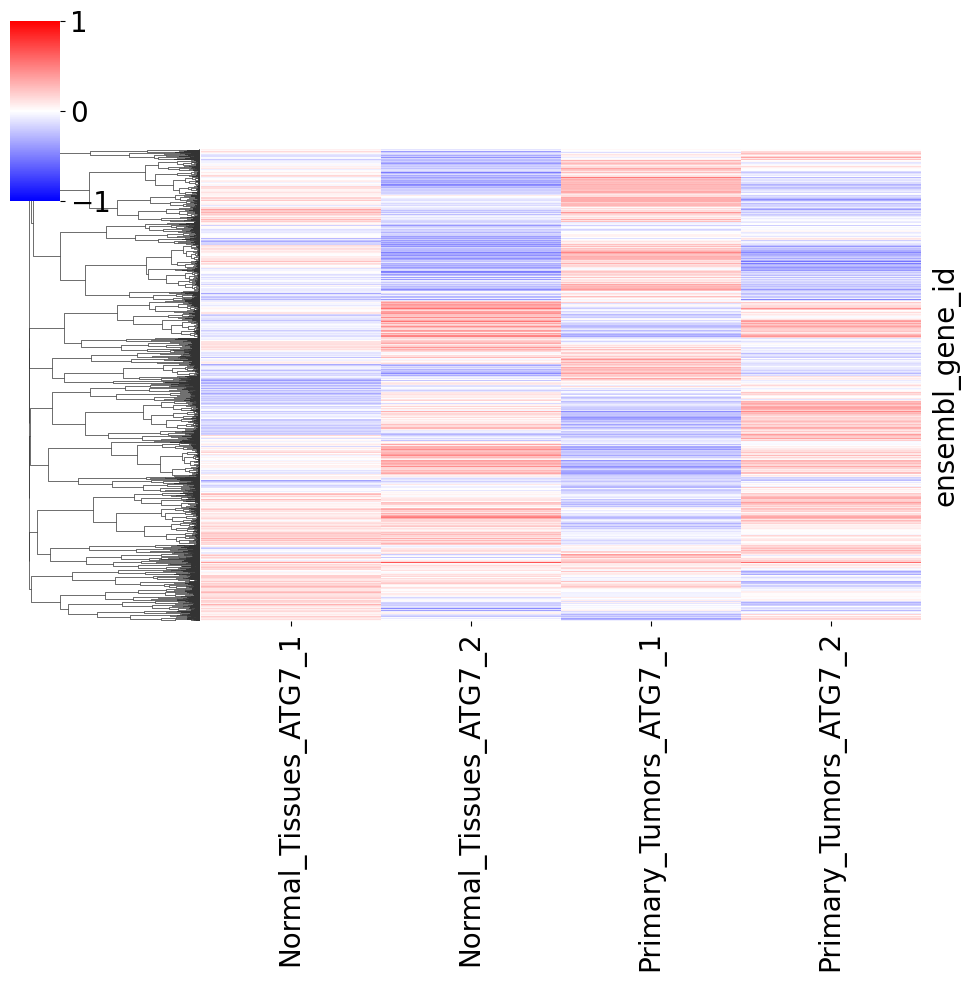

In [64]:
path = 'ATG7/TCGA_GTEX/all_tissues/Correlation/figures_correlation/'

seaborn.clustermap(df_heatmap_norm_prim, vmin=-1, vmax=1, cmap = 'bwr',
                   yticklabels=False, method='complete', metric='cosine', col_cluster=False) 
# plt.title('Correlation of ATG7 expression in normal tissue')
# plt.savefig(output_file_directory+path+'heatmap_corr_normal.jpeg', dpi=1200)


# V] Venn diagrams

In [65]:
all_corr_negpos_extremities[0]

,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,ENSG00000155229,MMS19,0.462609,0.0,Normal_Tissues_ATG7_1
1,ENSG00000116132,PRRX1,0.441733,0.0,Normal_Tissues_ATG7_1
2,ENSG00000131697,NPHP4,0.436141,0.0,Normal_Tissues_ATG7_1
3,ENSG00000196588,MRTFA,0.429443,0.0,Normal_Tissues_ATG7_1
4,ENSG00000105989,WNT2,0.424452,0.0,Normal_Tissues_ATG7_1
...,...,...,...,...,...
19502,ENSG00000117054,ACADM,-0.476688,0.0,Normal_Tissues_ATG7_1
19503,ENSG00000131174,COX7B,-0.492093,0.0,Normal_Tissues_ATG7_1
19504,ENSG00000164976,MYORG,-0.500323,0.0,Normal_Tissues_ATG7_1
19505,ENSG00000151239,TWF1,-0.502648,0.0,Normal_Tissues_ATG7_1


In [66]:
len(all_corr_negpos_merged)

4

In [67]:
#separate pos and neg correlation
all_corr_positiv_extremities = []
all_corr_negativ_extremities = []

for df in all_corr_negpos_extremities:
    data_pos = df[df['r_value']>0]
    data_neg = df[df['r_value']<0]
    all_corr_positiv_extremities.append(data_pos)
    all_corr_negativ_extremities.append(data_neg)
print(len(all_corr_positiv_extremities))
all_corr_negativ_extremities[0].head()

4


,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
19312,ENSG00000187714,SLC18A3,-0.325937,0.0,Normal_Tissues_ATG7_1
19313,ENSG00000116171,SCP2,-0.326195,0.0,Normal_Tissues_ATG7_1
19314,ENSG00000138382,METTL5,-0.326777,0.0,Normal_Tissues_ATG7_1
19315,ENSG00000176105,YES1,-0.326824,0.0,Normal_Tissues_ATG7_1
19316,ENSG00000072803,FBXW11,-0.326904,0.0,Normal_Tissues_ATG7_1


## 1) Venn diagrams of correlation of all the genes

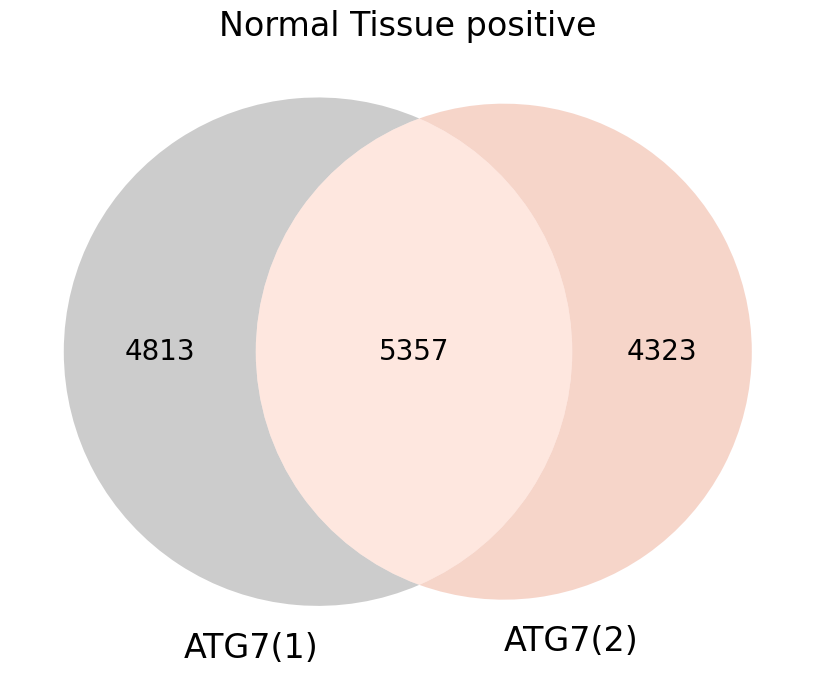

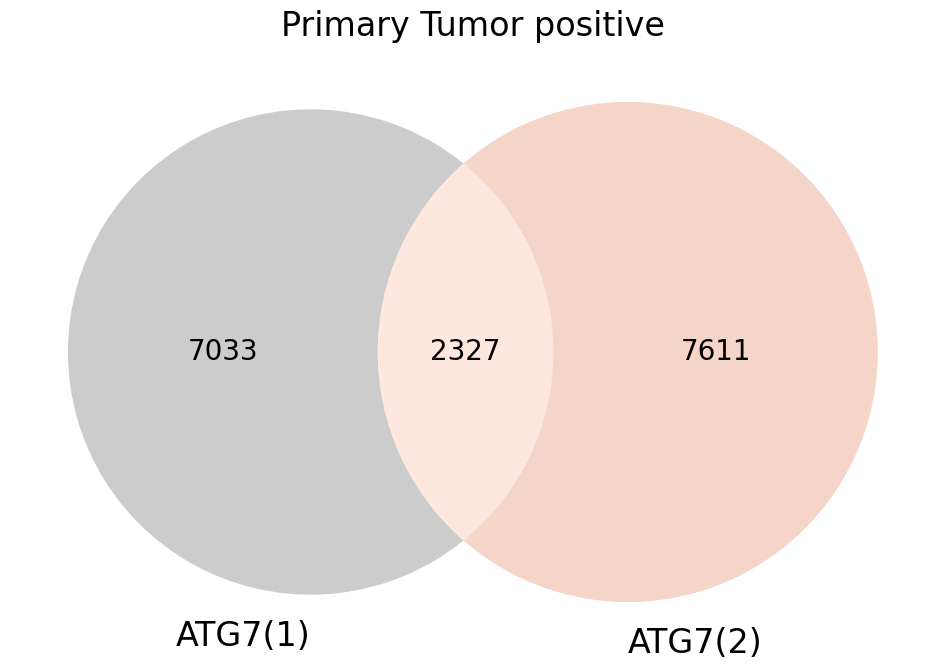

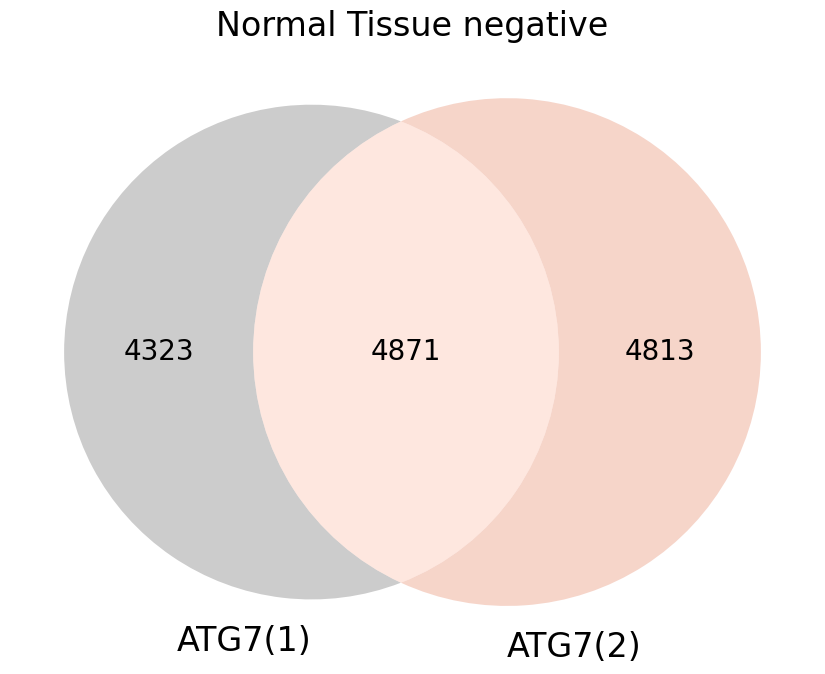

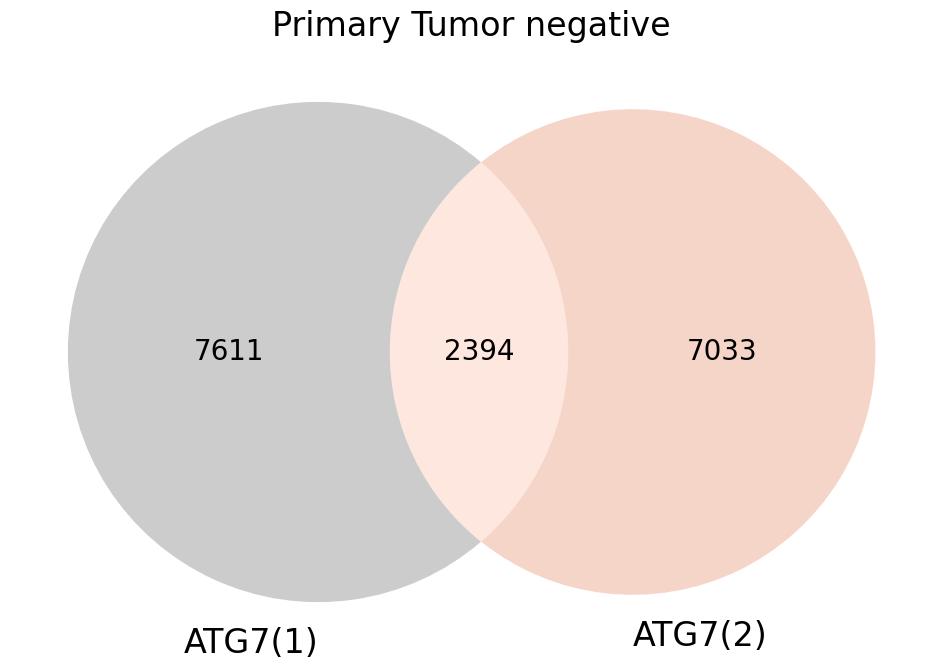

<Figure size 1200x800 with 0 Axes>

In [68]:
#VENN DIAGRAMS ATG7(1) vs ATG7(2) FOR the 100% of the genes

data_pos =  [
         [all_positiv_corr_spearman[0], all_positiv_corr_spearman[1], 'Normal Tissue', 'positive'], 
         [all_positiv_corr_spearman[2], all_positiv_corr_spearman[3], 'Primary Tumor', 'positive']
         ]

data_neg =  [
         [all_negativ_corr_spearman[0], all_negativ_corr_spearman[1], 'Normal Tissue', 'negative'], 
         [all_negativ_corr_spearman[2], all_negativ_corr_spearman[3], 'Primary Tumor', 'negative']
         ]

data = data_pos + data_neg

list_only1 = []
list_only2 = []

for dfs in data:
  set1 = set(dfs[0]['ensembl_gene_id'])
  set2 = set(dfs[1]['ensembl_gene_id'])
  subset = (set1, set2)

  #just to save some results in list
  with_only1 = set2.symmetric_difference(set1) & set1
  list_only1.append(with_only1)

  with_only2 = set2.symmetric_difference(set1) & set2
  list_only2.append(with_only2)

  #Venn Diagram
  venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
  label_title = dfs[2] + ' ' + dfs[3]
  plt.title(label_title)
  path = 'ATG7/TCGA_GTEX/all_tissues/Correlation/venn_diagram/all_correlation/'
  plt.savefig(output_file_directory+path+label_title+'.svg')
    
  plt.show()
  plt.clf()
  print()




## 2) Venn diagrams of the 1% the most correlated genes with the two isoforms for each tissue 

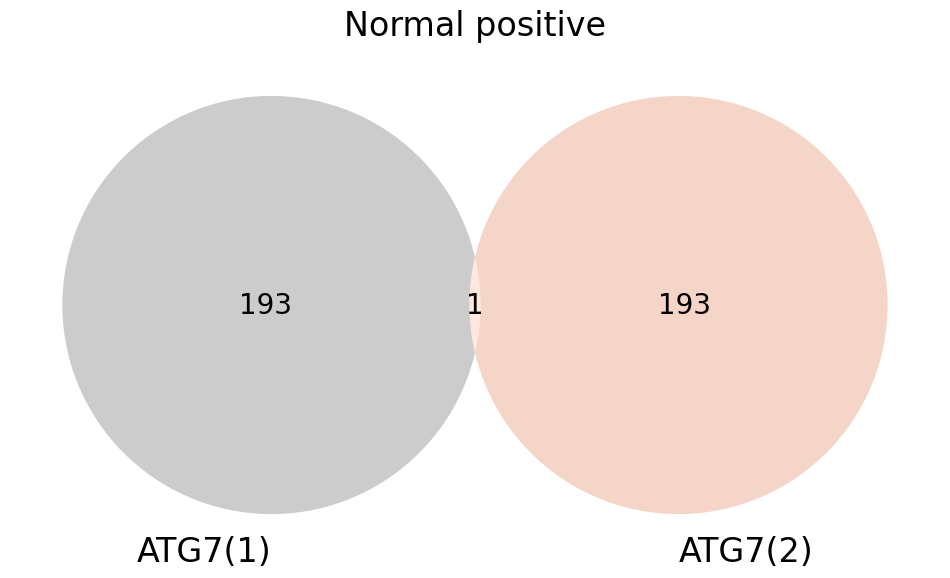

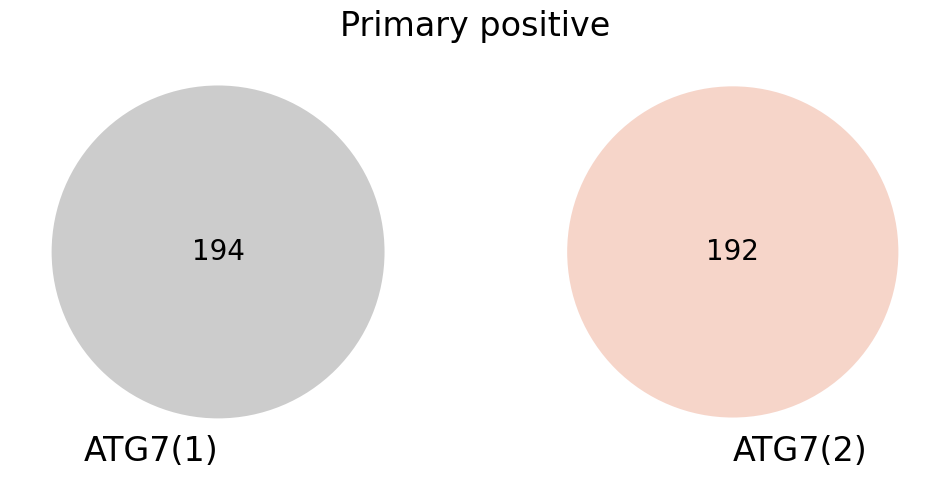

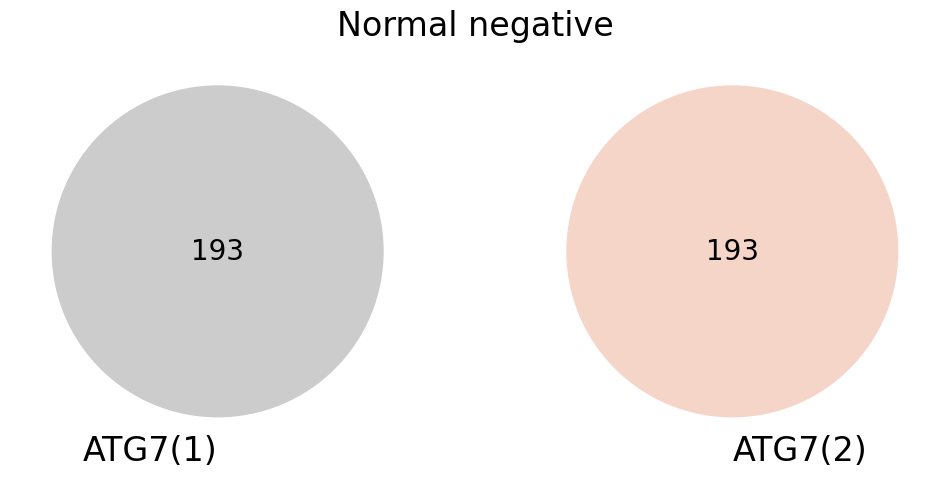

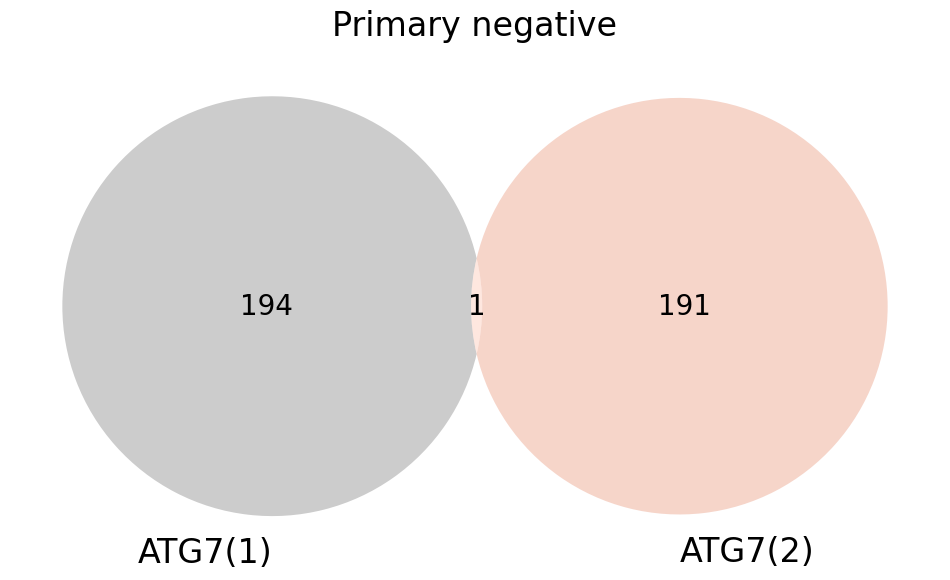

<Figure size 1200x800 with 0 Axes>

In [69]:
#VENN DIAGRAMS ATG7(1)vs ATG7(2) FOR the 1% of the genes the most correlated
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[1], 'Normal', 'positive'], 
         [all_corr_positiv_extremities[2], all_corr_positiv_extremities[3], 'Primary', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[1], 'Normal', 'negative'], 
         [all_corr_negativ_extremities[2], all_corr_negativ_extremities[3], 'Primary', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_only1 = list(set2.symmetric_difference(set1) & set1)
    with_only2 = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_ATG7_1 = with_only1, Only_ATG7_2 = with_only2, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos_'+dfs[2]+'_'+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_extremities/'
#     df_only_and_intersection.to_excel(output_file_directory+path+name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    path = 'ATG7/TCGA_GTEX/all_tissues/Correlation/venn_diagram/1perc_correlation/'
    plt.savefig(output_file_directory+path+label_title+'.svg')
    
    plt.show()
    plt.clf()

    print()

In [70]:
print(len(all_corr_negativ_extremities), 'iso1_norm, iso2_norm, iso1_prim, iso2_prim')

4 iso1_norm, iso2_norm, iso1_prim, iso2_prim


## 3) Venn diagrams of the 1% the most correlated genes for each isoform in normal and primary tissues

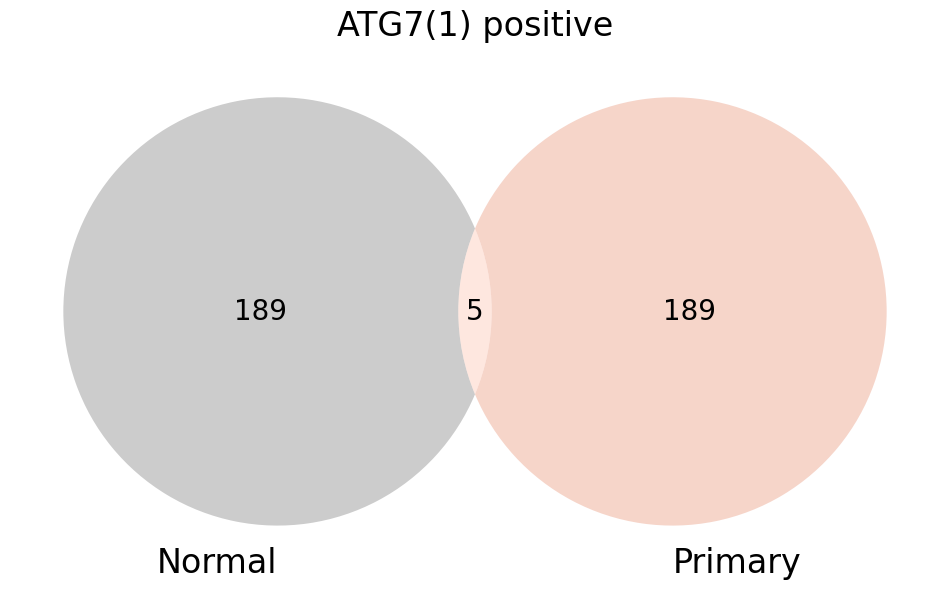

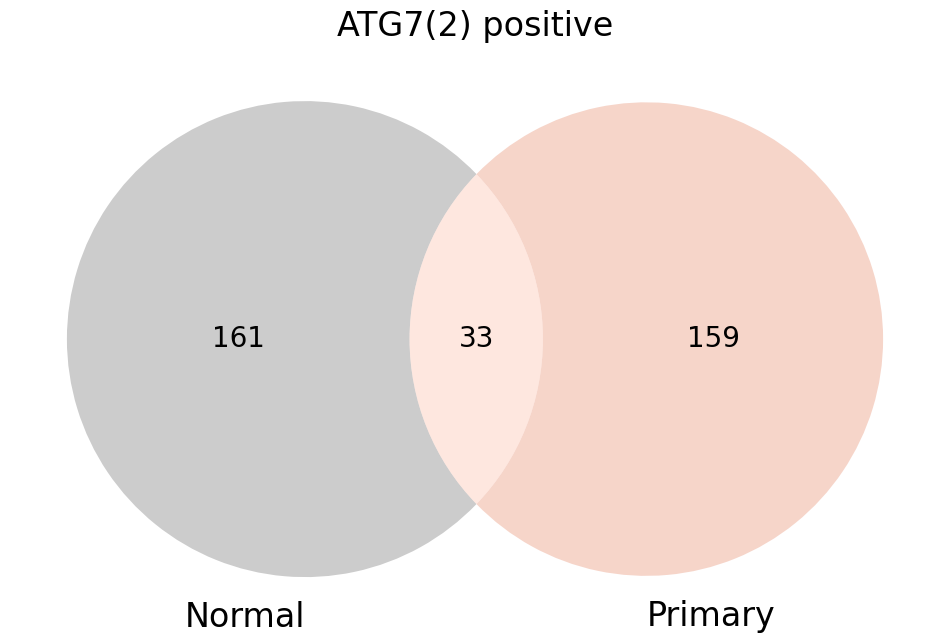

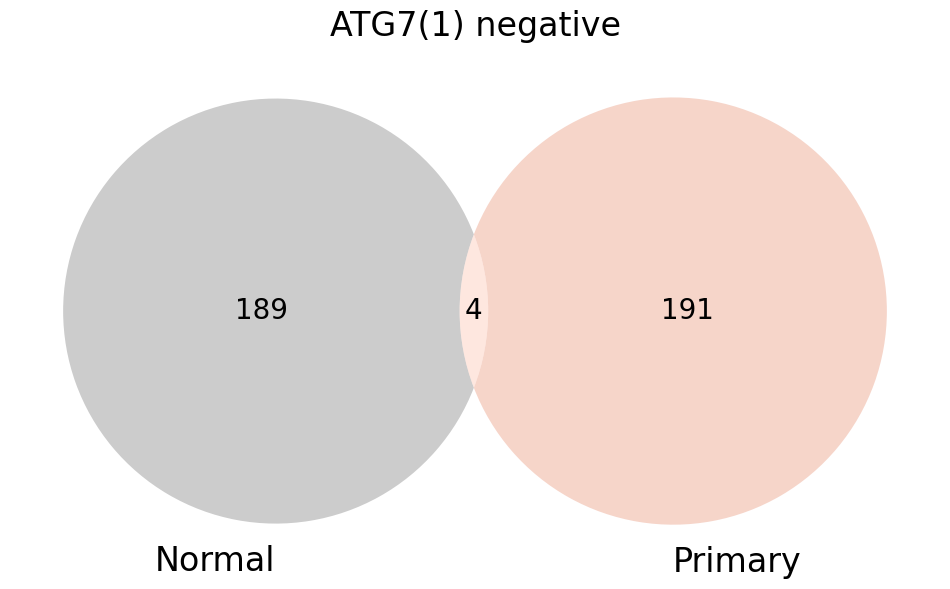

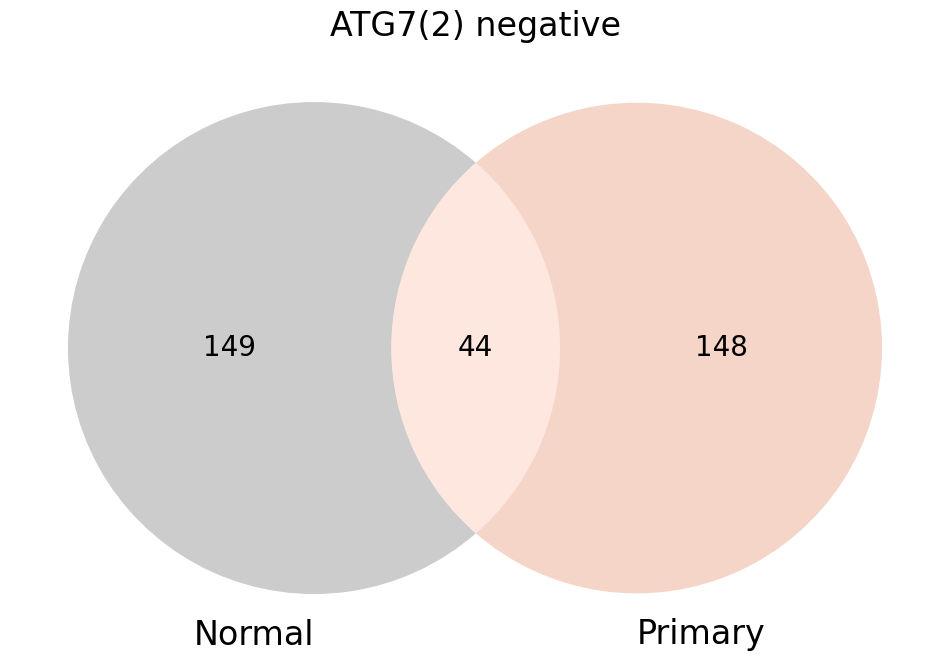

<Figure size 1200x800 with 0 Axes>

In [71]:
#VENN DIAGRAMS FOR NORM vs PRIM for the 1% of the genes the most correlated
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[2], 'ATG7(1)', 'positive'], 
         [all_corr_positiv_extremities[1], all_corr_positiv_extremities[3], 'ATG7(2)', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[2], 'ATG7(1)', 'negative'], 
         [all_corr_negativ_extremities[1], all_corr_negativ_extremities[3], 'ATG7(2)', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_normal = list(set2.symmetric_difference(set1) & set1)
    with_primary = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_normal = with_normal, Only_primary = with_primary, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos_'+dfs[2]+'_'+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_extremities/'
#     df_only_and_intersection.to_excel(output_file_directory+path+name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('Normal', 'Primary'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    path = 'ATG7/TCGA_GTEX/all_tissues/Correlation/venn_diagram/1perc_correlation/'
    plt.savefig(output_file_directory+path+label_title+'.svg') 

    plt.show()
    plt.clf()

    print()